In [1]:
import sys
try:
    import sntd
except:
    sys.path.append('../')
    import sntd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
myMISN = sntd.createMultiplyImagedSN(sourcename='salt2-extended', snType='Ia', redshift=1.33,z_lens=.53, bands=['F110W','F140W'],
              zp=[26.8,26.2], cadence=5., epochs=35.,time_delays=[20., 70.], magnifications=[4,6],scatter=True,
              objectName='My Type Ia SN',telescopename='HST',numImages=2,av_host=False)

{'image_1': 0, 'image_2': 50.71077995894944}


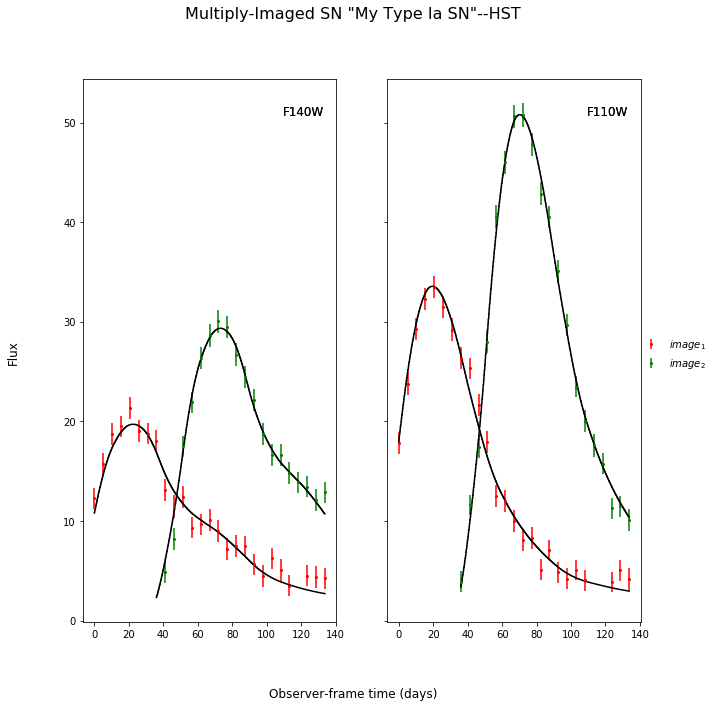

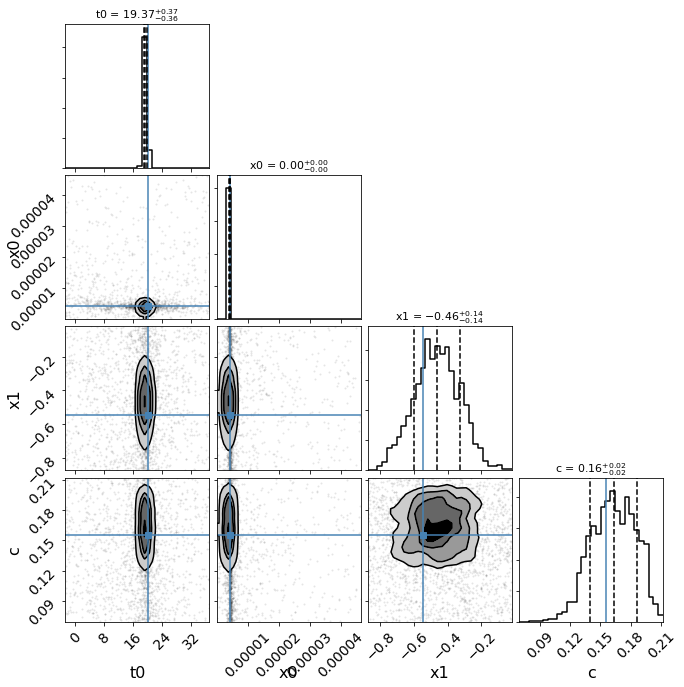

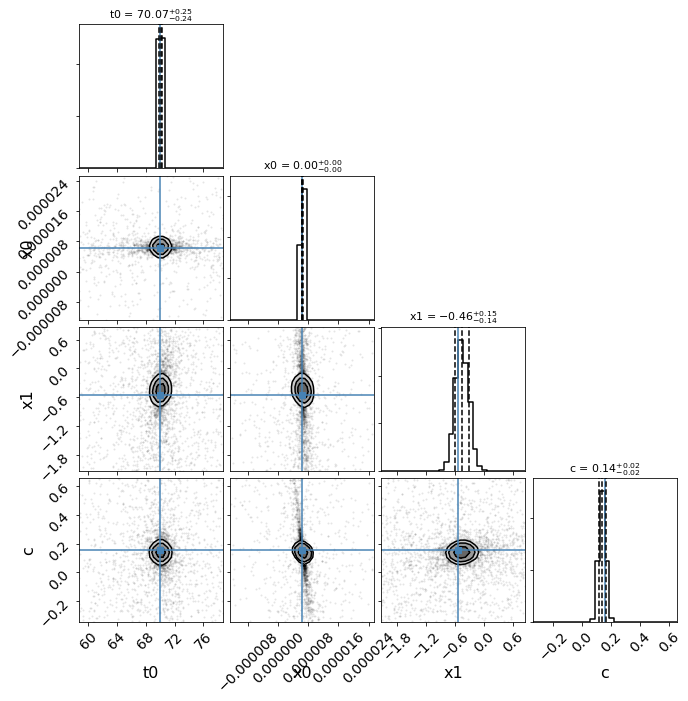

In [3]:
#normal parallel fit with some options set
fitCurves=sntd.fit_data(myMISN,snType='Ia', models='salt2-extended',bands=['F110W','F140W'],
            params=['x0','t0','x1','c'],constants={'z':1.33},refImage='image_1',cut_time=[-50,30],
            bounds={'t0':(-20,20),'x1':(-3,3),'c':(-1,1)},
            fitOrder=['image_2','image_1'],fit_prior=None,trial_fit=True,minsnr=3,
            method='parallel',microlensing=None,modelcov=False,npoints=200,clip_data=True,
                        maxiter=None)
fitCurves.plot_object(showFit=True)
for im in fitCurves.images.keys():
    fitCurves.plot_fit(par_image=im)
print(fitCurves.parallel.time_delays)

Starting parallel method...
Starting series method...
17.195445108978547 42.80444045013985 10.028216333107103
Starting color method...
parallel
-------------------
{'image_1': 0, 'image_2': 50.66792037655517}
{'image_1': [0, 0], 'image_2': array([-0.3361871 ,  0.39002698])}
{'image_1': 1, 'image_2': 1.5255341939293388}
{'image_1': [0, 0], 'image_2': array([-0.03633343,  0.0343652 ])}


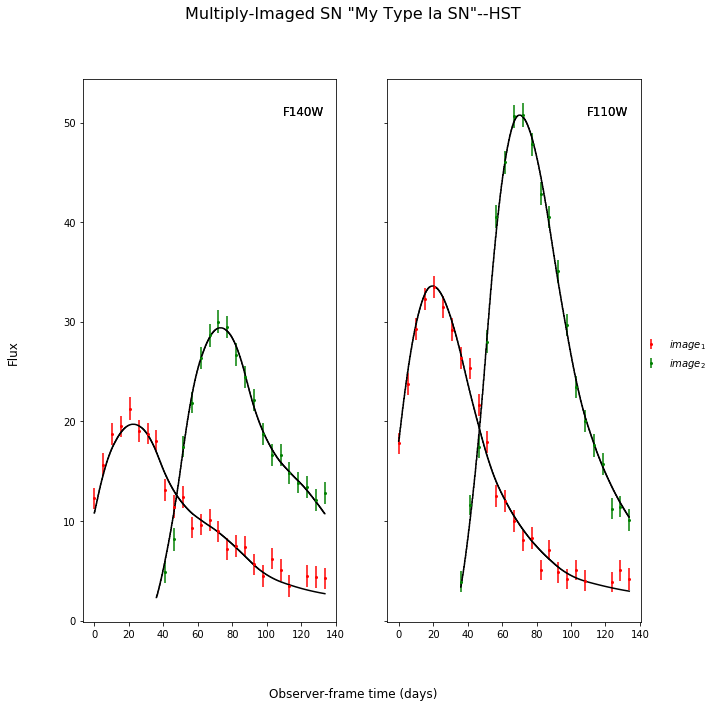

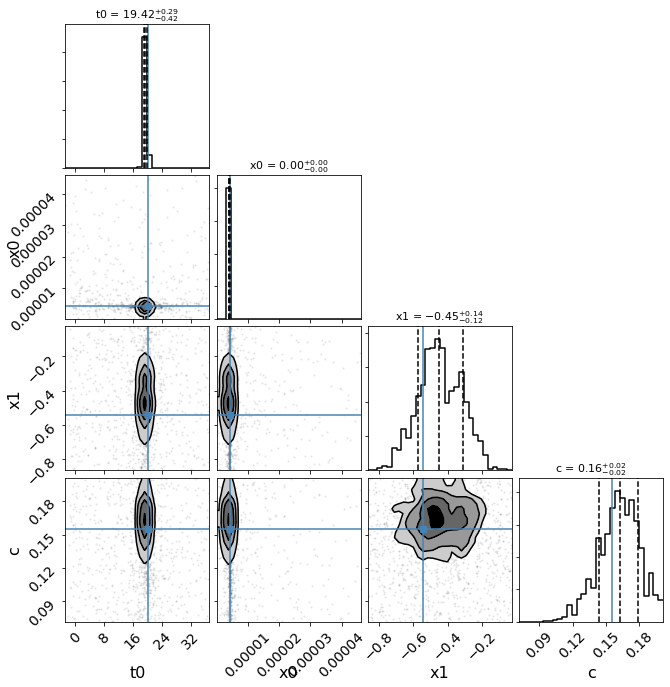

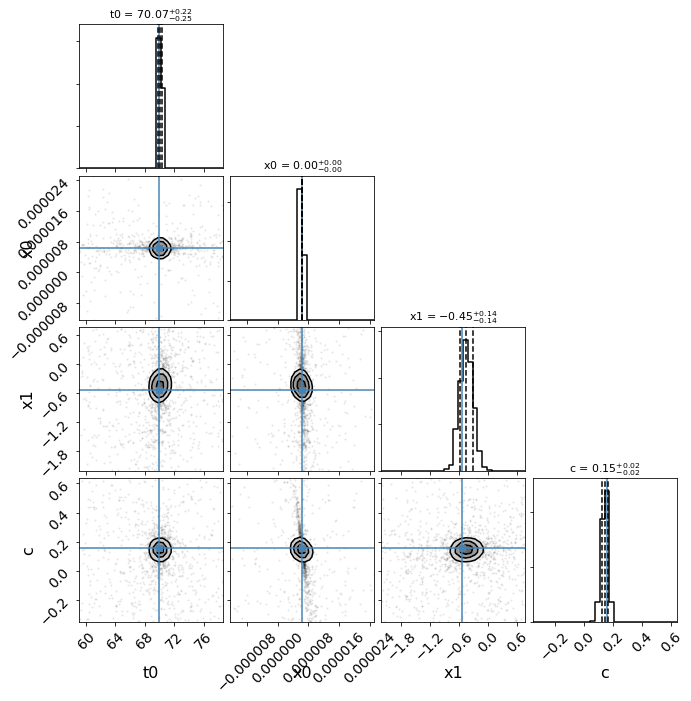

series
-------------------
{'image_1': 0, 'image_2': 50.63320002054975}
{'image_1': [0, 0], 'image_2': array([-0.59071169,  0.52382201])}
{'image_1': 1, 'image_2': 1.499365374179781}
{'image_1': [0, 0], 'image_2': array([-0.02301077,  0.02357193])}


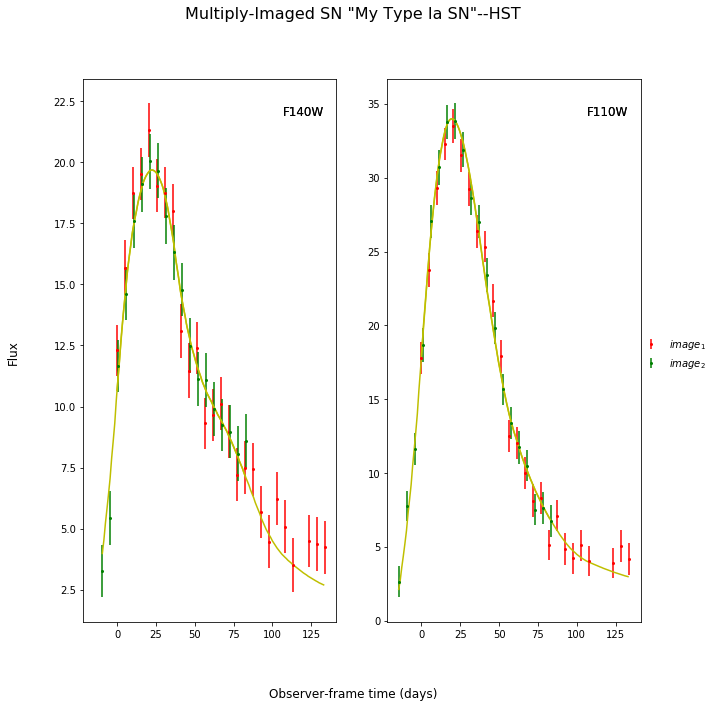

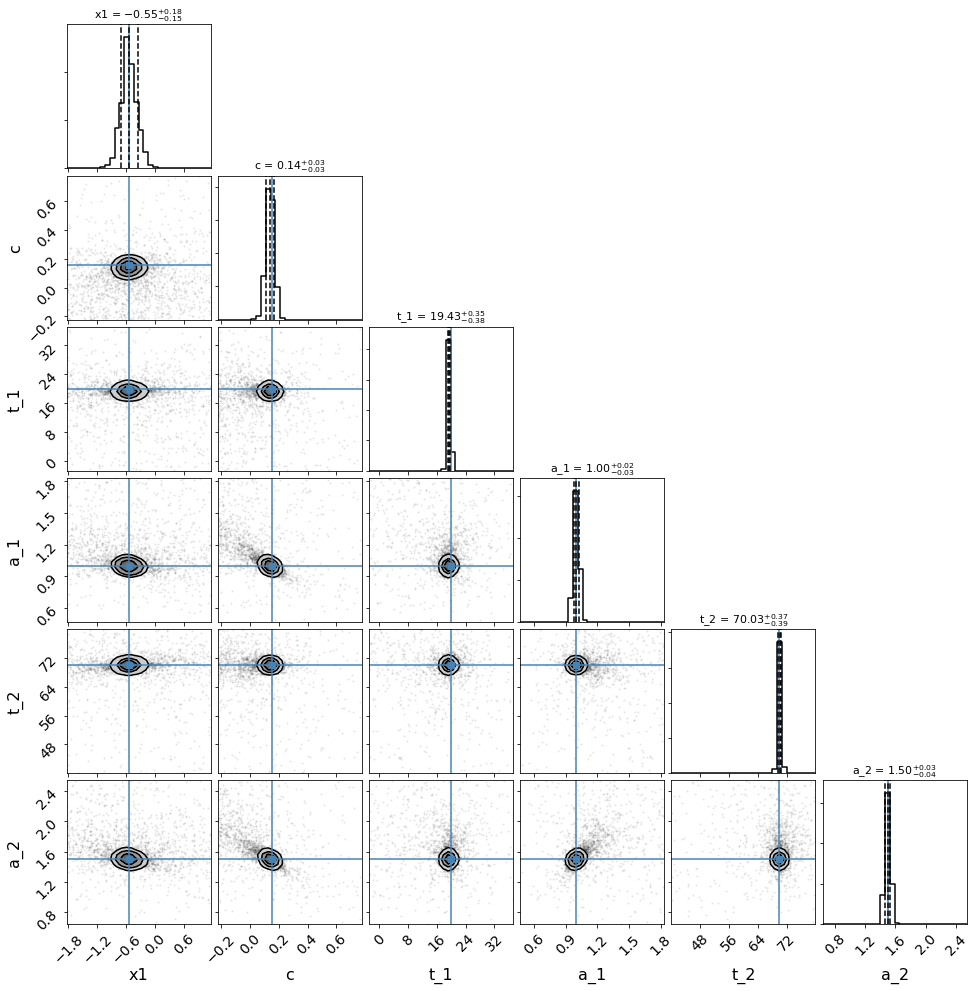

color
-------------------
{'image_1': 0, 'image_2': 45.82938100734074}
{'image_1': [0, 0], 'image_2': array([-5.42969707,  3.51430009])}


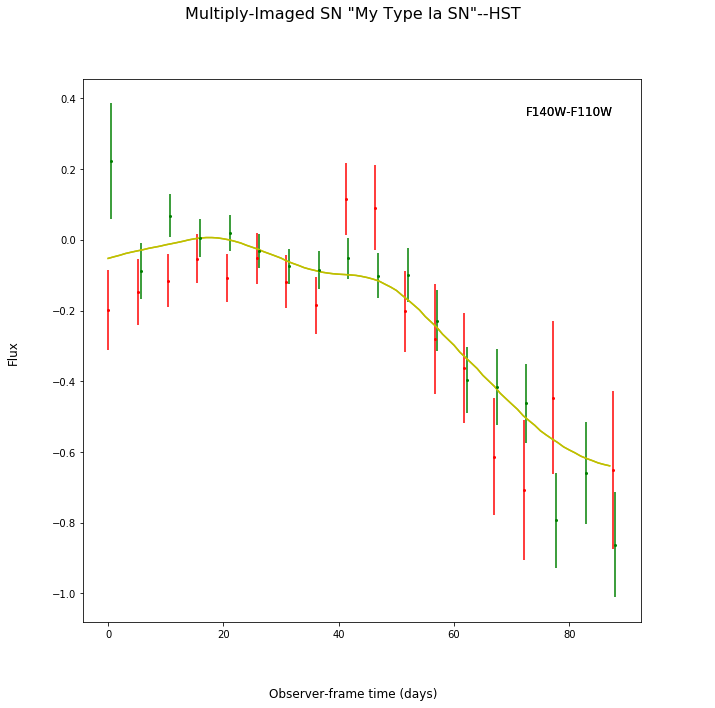

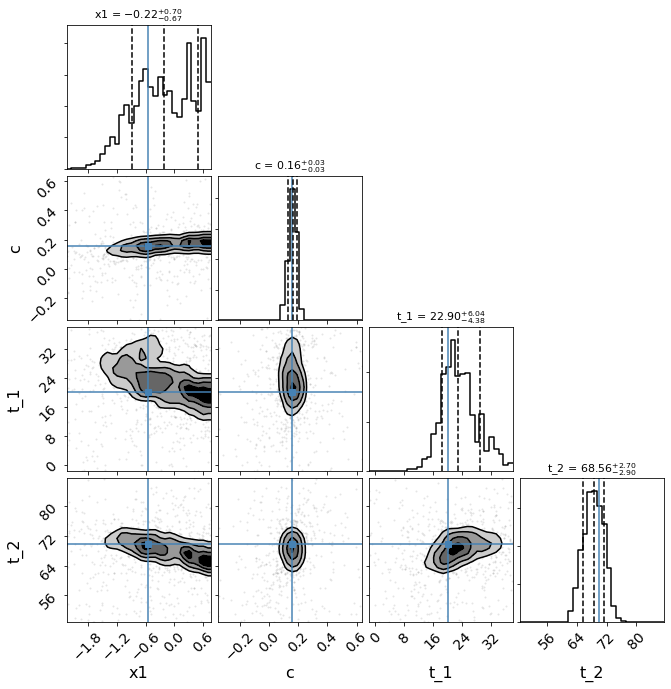

In [4]:
#fitting all three methods consectutively, and independently

fitCurves=sntd.fit_data(myMISN,snType='Ia', models='salt2-extended',bands=['F110W','F140W'],
            params=['x0','t0','x1','c'],constants={'z':1.33},refImage='image_1',cut_time=[-50,30],
            bounds={'t0':(-20,20),'x1':(-3,3),'c':(-1,1),'mu':(.5,2),'td':(-20,20)},minsnr=5,
            fitOrder=['image_2','image_1'],fit_prior=None,
            method=['parallel','series','color'],microlensing=None,modelcov=False,npoints=100,
                        maxiter=None)
print('parallel')
print('-------------------')
print(fitCurves.parallel.time_delays)
print(fitCurves.parallel.time_delay_errors)
print(fitCurves.parallel.magnifications)
print(fitCurves.parallel.magnification_errors)
fitCurves.plot_object(showFit=True,method='parallel')
plt.show()
fitCurves.plot_fit(method='parallel',par_image='image_1')
plt.show()
fitCurves.plot_fit(method='parallel',par_image='image_2')
plt.show()
print('series')
print('-------------------')
print(fitCurves.series.time_delays)
print(fitCurves.series.time_delay_errors)
print(fitCurves.series.magnifications)
print(fitCurves.series.magnification_errors)
fitCurves.plot_object(showFit=True,method='series')
plt.show()
fitCurves.plot_fit(method='series')
plt.show()
print('color')
print('-------------------')
print(fitCurves.color.time_delays)
print(fitCurves.color.time_delay_errors)
fitCurves.plot_object(showFit=True,method='color',bands=fitCurves.color.bands)
plt.show()
fitCurves.plot_fit(method='color')
plt.show()

In [6]:
myMISN2 = sntd.createMultiplyImagedSN(sourcename='salt2-extended', snType='Ia', redshift=1.33,z_lens=.53, bands=['F110W','F140W'],
              zp=[26.8,26.2], cadence=5., epochs=35.,time_delays=[20., 70.], magnifications=[4,6],scatter=True,
              objectName='My Type Ia SN',telescopename='HST',numImages=2,av_host=False)

Starting parallel method...
Starting series method...
{'image_2': 0.0, 'image_1': -50.65899056287696}
70.06501664404864 0.0 0.4170759327667592
Starting color method...
parallel
-------------------
{'image_1': 0, 'image_2': 50.298856354847075}
{'image_1': [0, 0], 'image_2': array([-0.35389314,  0.39392539])}
{'image_1': 1, 'image_2': 1.5184924163525009}
{'image_1': [0, 0], 'image_2': array([-0.03354229,  0.04096095])}


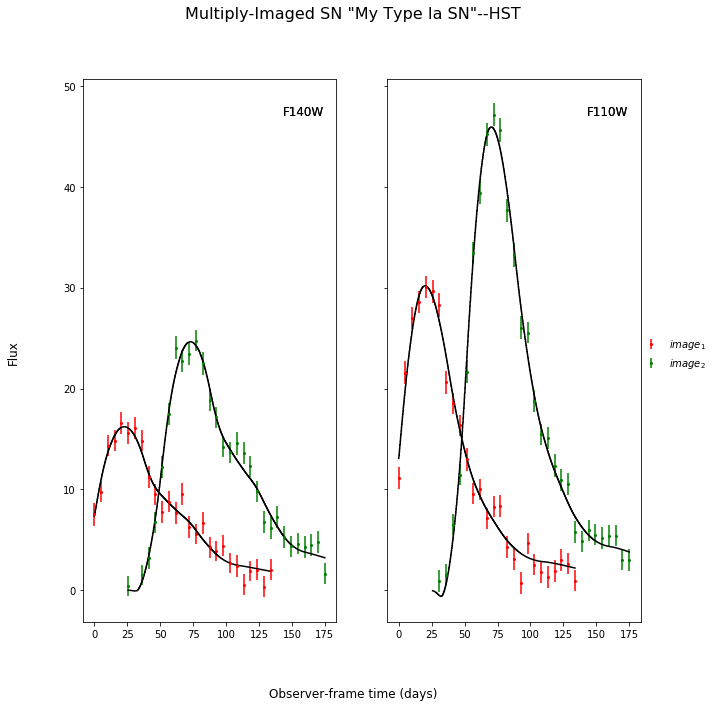

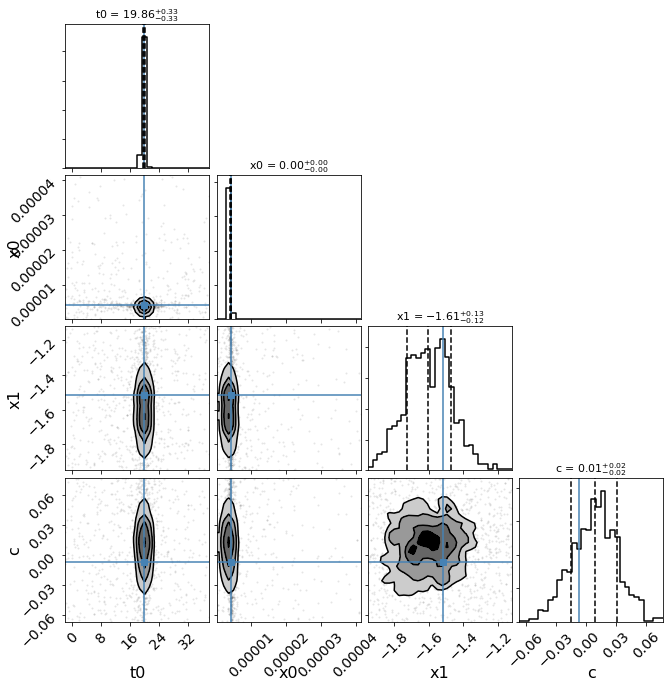

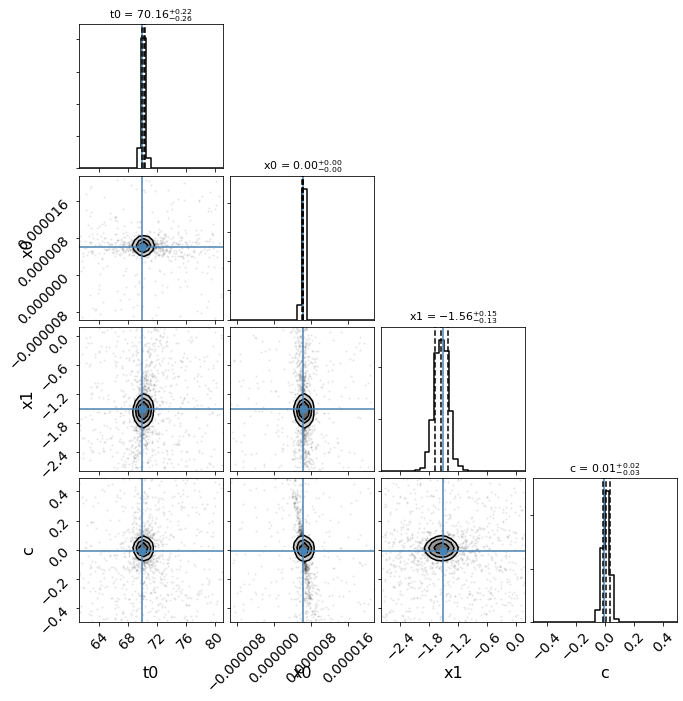

series
-------------------
{'image_1': 0, 'image_2': 50.6002485346844}
{'image_1': [0, 0], 'image_2': array([-0.28873931,  0.32171311])}
{'image_1': 1, 'image_2': 1.507637336027996}
{'image_1': [0, 0], 'image_2': array([-0.00128199,  0.00137666])}


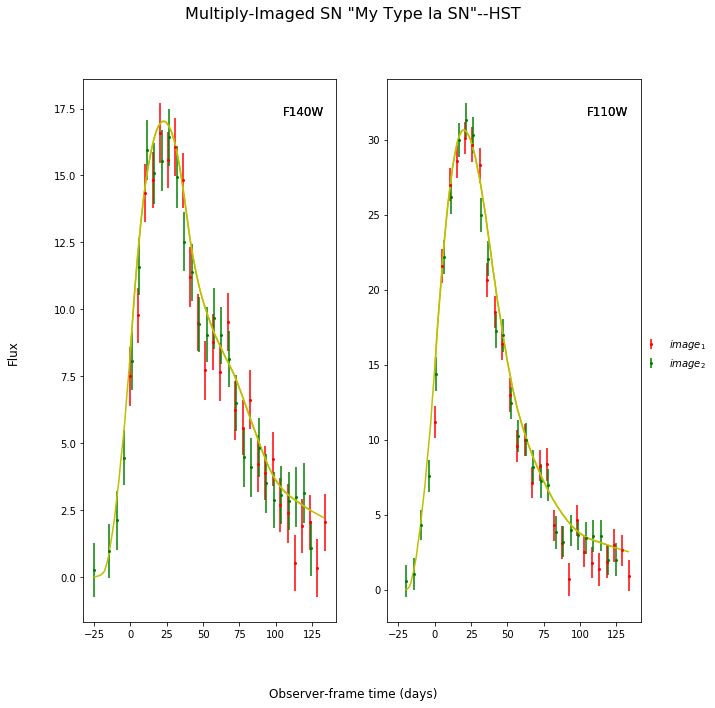

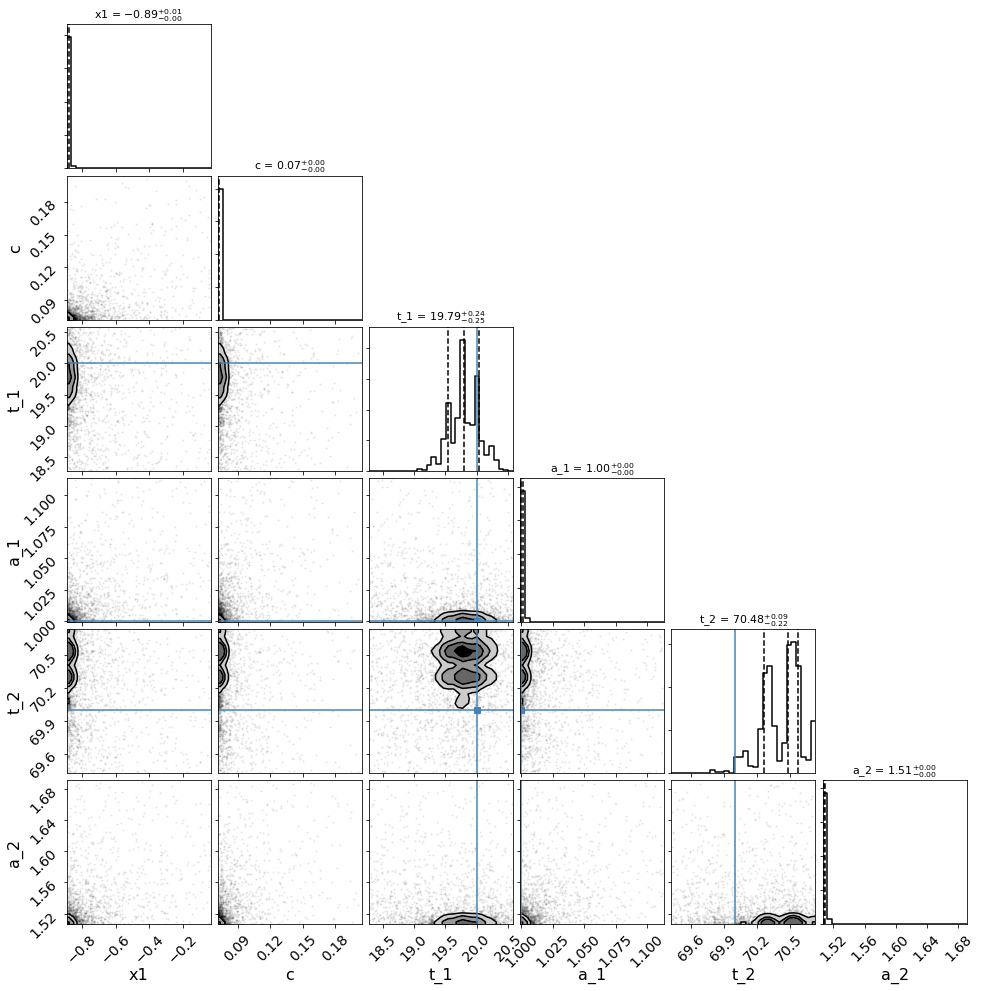

color
-------------------
{'image_1': 0, 'image_2': 50.60961675879777}
{'image_1': [0, 0], 'image_2': array([-0.83872176,  0.78784787])}


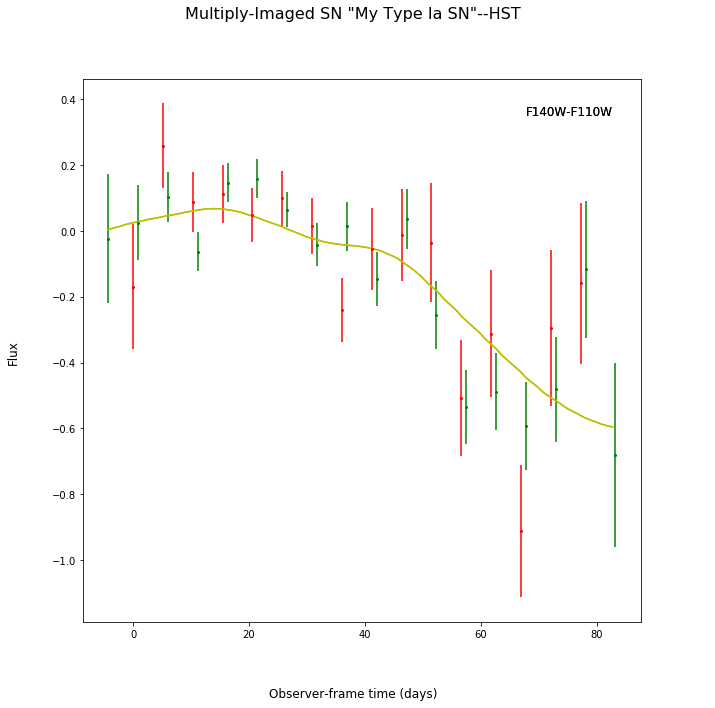

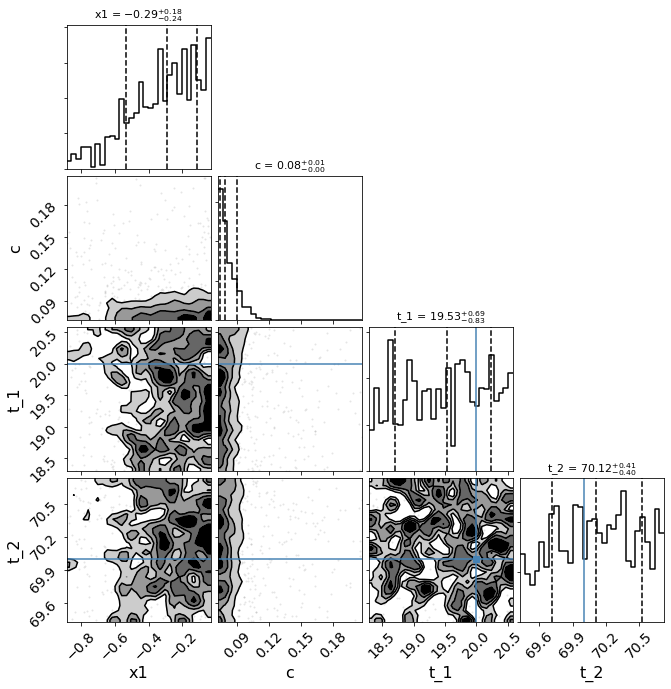

In [7]:
#fitting all three methods consectutively, using parallel as a prior

fitCurves2=sntd.fit_data(myMISN2,snType='Ia', models='salt2-extended',bands=['F110W','F140W'],
            params=['x0','t0','x1','c'],constants={'z':1.33},refImage='image_1',cut_time=[-50,30],
            bounds={'t0':(-20,20),'x1':(-3,3),'c':(-1,1),'mu':(.5,2),'td':(-20,20)},minsnr=5,
            fitOrder=['image_2','image_1'],fit_prior=fitCurves,
            method=['parallel','series','color'],microlensing=None,modelcov=False,npoints=100,
                        maxiter=None)
print('parallel')
print('-------------------')
print(fitCurves2.parallel.time_delays)
print(fitCurves2.parallel.time_delay_errors)
print(fitCurves2.parallel.magnifications)
print(fitCurves2.parallel.magnification_errors)
fitCurves2.plot_object(showFit=True,method='parallel')
plt.show()
fitCurves2.plot_fit(method='parallel',par_image='image_1')
plt.show()
fitCurves2.plot_fit(method='parallel',par_image='image_2')
plt.show()
print('series')
print('-------------------')
print(fitCurves2.series.time_delays)
print(fitCurves2.series.time_delay_errors)
print(fitCurves2.series.magnifications)
print(fitCurves2.series.magnification_errors)
fitCurves2.plot_object(showFit=True,method='series')
plt.show()
fitCurves2.plot_fit(method='series')
plt.show()
print('color')
print('-------------------')
print(fitCurves2.color.time_delays)
print(fitCurves2.color.time_delay_errors)
fitCurves2.plot_object(showFit=True,method='color',bands=fitCurves2.color.bands)
plt.show()
fitCurves2.plot_fit(method='color')
plt.show()
